# 1BM18CS030 - Divyank Gupta

## EM-Algorithm and its comparision with K-means

The accuracy score of EM:  0.9666666666666667
The Confusion matrix of EM:
  [[50  0  0]
 [ 0 45  5]
 [ 0  0 50]]
The accuracy score of K-Mean:  0.09333333333333334
The Confusion matrixof K-Mean:
 [[ 0 50  0]
 [ 2  0 48]
 [36  0 14]]


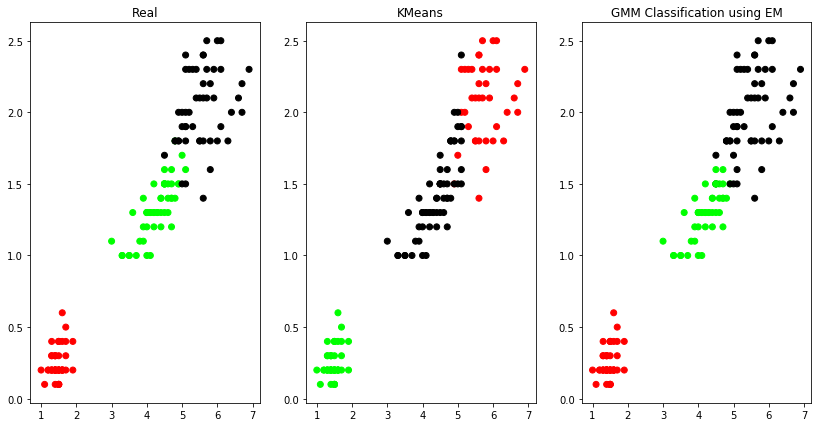

In [3]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import sklearn.metrics as metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width', 'Class']

dataset = pd.read_csv("EM-dataset.csv", names=names)

X = dataset.iloc[:, :-1]  

label = {'Iris-setosa': 0,'Iris-versicolor': 1, 'Iris-virginica': 2} 

y = [label[c] for c in dataset.iloc[:, -1]]

plt.figure(figsize=(14,7))
colormap=np.array(['red','lime','black'])

# REAL PLOT
plt.subplot(1,3,1)
plt.title('Real')
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y])

# GMM PLOT
gmm=GaussianMixture(n_components=3, random_state=0).fit(X)
y_cluster_gmm=gmm.predict(X)
plt.subplot(1,3,3)
plt.title('GMM Classification using EM')
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y_cluster_gmm])

print('The accuracy score of EM: ',metrics.accuracy_score(y, y_cluster_gmm))
print('The Confusion matrix of EM:\n ',metrics.confusion_matrix(y, y_cluster_gmm))

# K-PLOT
model=KMeans(n_clusters=3, random_state=0).fit(X)
plt.subplot(1,3,2)
plt.title('KMeans')
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[model.labels_])

print('The accuracy score of K-Mean: ',metrics.accuracy_score(y, model.labels_))
print('The Confusion matrixof K-Mean:\n',metrics.confusion_matrix(y, model.labels_))